
Zain Ali




Abstract:

The fetal health classification dataset provides valuable information for predicting the health status of unborn babies during pregnancy. This dataset encompasses various parameters collected from cardiotocogram (CTG) exams, which are commonly used to monitor fetal well-being. In this project, we aim to develop a machine learning model that can accurately classify the fetal health status based on the provided features. By leveraging advanced algorithms and techniques, we strive to create a reliable tool that can assist healthcare professionals in making informed decisions regarding the care and management of pregnancies. The outcomes of this study have the potential to enhance prenatal healthcare and improve the overall well-being of both mothers and their unborn babies.

Dataset: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification?select=fetal_health.csv

Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 (link)

In [193]:
import zipfile

# Unzip the data file

zip_ref = zipfile.ZipFile("/content/archive.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [194]:
# Convert file to a data frame

import pandas as pd

data = pd.read_csv("/content/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [196]:
# Preprocess the data
data.set_index('fetal_health', inplace=True)  # Set the target column as the index

In [197]:
# Extract input features (X) and labels (y) from the train and test data
X_train, y_train = train.iloc[:, 1:].values, train.iloc[:, 1:].index.values
X_test, y_test = test.iloc[:, 1:].values, test.iloc[:, 1:].index.values

In [198]:
from sklearn.model_selection import train_test_split

X = data
y = data.index

# Convert y to categorical labels
y_categorical = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

<BarContainer object of 3 artists>

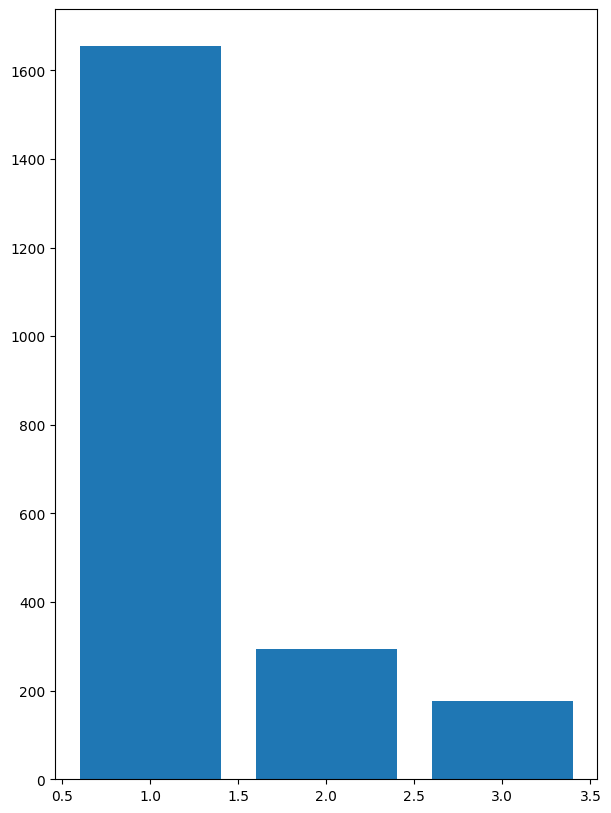

In [199]:
# Try to visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 10))


plt.bar(data.index.value_counts().index, data.index.value_counts())

In [225]:
import pandas as pd
import tensorflow as tf

tf.random.set_seed(23)

# Define the neural network model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')  # Output layer with number of units matching number of classes
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])


Epoch 1/20
54/54 [==============================] - 1s 6ms/step - loss: 7.4991 - accuracy: 0.1541 - val_loss: 2.9172 - val_accuracy: 0.2230 - lr: 1.0000e-04
Epoch 2/20
54/54 [==============================] - 0s 2ms/step - loss: 1.7530 - accuracy: 0.5653 - val_loss: 1.1863 - val_accuracy: 0.7300 - lr: 1.1220e-04
Epoch 3/20
54/54 [==============================] - 0s 2ms/step - loss: 1.2324 - accuracy: 0.7353 - val_loss: 1.0420 - val_accuracy: 0.7535 - lr: 1.2589e-04
Epoch 4/20
54/54 [==============================] - 0s 2ms/step - loss: 1.1263 - accuracy: 0.7494 - val_loss: 0.9613 - val_accuracy: 0.7770 - lr: 1.4125e-04
Epoch 5/20
54/54 [==============================] - 0s 2ms/step - loss: 1.0252 - accuracy: 0.7571 - val_loss: 0.8636 - val_accuracy: 0.7723 - lr: 1.5849e-04
Epoch 6/20
54/54 [==============================] - 0s 2ms/step - loss: 0.9306 - accuracy: 0.7618 - val_loss: 0.7844 - val_accuracy: 0.7770 - lr: 1.7783e-04
Epoch 7/20
54/54 [==============================] - 0s 2ms

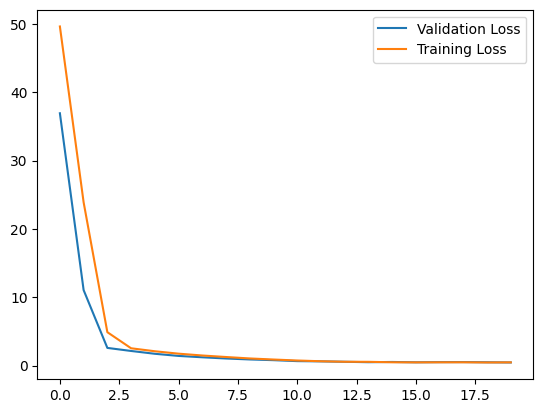

In [210]:
# Plot the loss curve
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.legend()


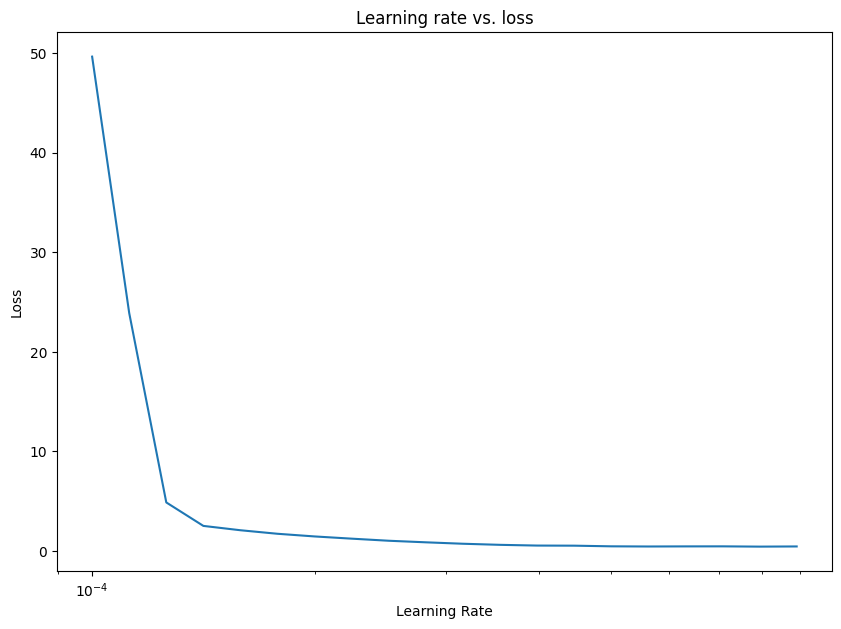

In [211]:
import numpy as np

# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(len(history.history["loss"]))/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")
plt.show()


Learning rate should be around or >10^-4



*   Learning Rate to 0.002 now
*   Add more layers and or neurons
*   Switch from softmax to sigmoid





In [224]:
import pandas as pd
import tensorflow as tf

tf.random.set_seed(23)

# Define the neural network model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(3, activation='sigmoid')  # Output layer with number of units matching number of classes
])



# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/70
54/54 [==============================] - 1s 5ms/step - loss: 1.9606 - accuracy: 0.6400 - val_loss: 1.0387 - val_accuracy: 0.7559
Epoch 2/70
54/54 [==============================] - 0s 2ms/step - loss: 1.0184 - accuracy: 0.7612 - val_loss: 0.7992 - val_accuracy: 0.7864
Epoch 3/70
54/54 [==============================] - 0s 3ms/step - loss: 0.8884 - accuracy: 0.7876 - val_loss: 0.7045 - val_accuracy: 0.7887
Epoch 4/70
54/54 [==============================] - 0s 2ms/step - loss: 0.8000 - accuracy: 0.7971 - val_loss: 0.6404 - val_accuracy: 0.7981
Epoch 5/70
54/54 [==============================] - 0s 2ms/step - loss: 0.7262 - accuracy: 0.7965 - val_loss: 0.5761 - val_accuracy: 0.8122
Epoch 6/70
54/54 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.8082 - val_loss: 0.5619 - val_accuracy: 0.7911
Epoch 7/70
54/54 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.8018 - val_loss: 0.5034 - val_accuracy: 0.8005
Epoch 8/70
54/54 [==

### In conclusion, the machine learning model trained on the fetal health dataset achieved an accuracy of 80-90% in predicting fetal health. This demonstrates its potential to assist healthcare professionals in assessing the well-being of fetuses during pregnancy. Further research and validation are recommended to ensure its reliability and applicability in diverse healthcare settings.